<a href="https://colab.research.google.com/github/alberto1971/Curso-de-introduccion-a-Big-Data-Parte-4-nov2021/blob/main/3_Reconocimiento_de_d%C3%ADgitos_con_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#El Dataset MNIST 

El problema de clasificación de dígitos manuscritos del MNIST es un conjunto de datos estándar que se utiliza en visión artificial y aprendizaje profundo.

Como ya se habrá dado cuenta, necesitamos datos etiquetados para entrenar cualquier modelo. En este ejemplo, usaremos el conjunto de datos MNIST de dígitos escritos a mano. Este conjunto de datos es parte del paquete Keras. Contiene un conjunto de entrenamiento de 60.000 ejemplos y un conjunto de prueba de 10.000 ejemplos. Entrenaremos los datos en el conjunto de entrenamiento y validaremos los resultados en función de los datos de la prueba. Además, crearemos una imagen propia para probar si el modelo puede predecirla correctamente.

Primero, importemos el conjunto de datos MNIST de Keras. El método .load_data () devuelve los conjuntos de datos de entrenamiento y prueba:

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Si intentamos visualizar una de las imágenes como datos el aspecto sería el siguiente:

In [2]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Intentemos visualizar los dígitos en el conjunto de datos. Usamos la siguiente función mágica para mostrar diagramas de Matplotlib en línea:

In [3]:
%matplotlib inline

A continuación, importamos el módulo pyplot de matplotlib y usamos el método .imshow () para mostrar la imagen:

La etiqueta de la imagen es: 5


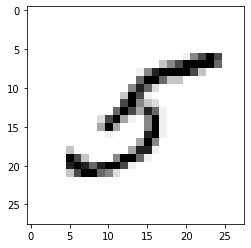

In [4]:
import matplotlib.pyplot as plt

image_index = 35
print("La etiqueta de la imagen es:", y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

Se imprime la etiqueta de la imagen y luego se muestra la imagen. Podemos observar que para cada pixel, el valor 0 representa el blanco y el valor 255 representa el color negro, y los valores intermedios entre 0 y 255 representan todos los tonos grises entre el blanco y el negro.

Verifiquemos los tamaños de los conjuntos de datos de entrenamiento y prueba:


In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Observamos que tenemos 60.000 imágenes de entrenamiento y 10.000 de test, y que cada imagen tiene las dimensiones 28 x 28 pixels

Podemos visualizar unas cuantas imágenes de dígitos

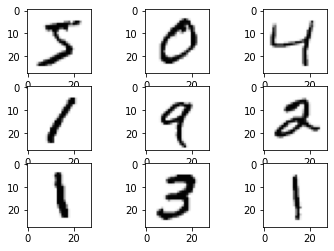

In [6]:
# plot first few images
#from matplotlib import pyplot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('Greys'))
# show the figure
plt.show()

A continuación, es posible que también deseemos explorar la variable dependiente, almacenada en y_train, que llamamos etiquetas. Podemos ver como se corresponden las etiquetas con las imágenes anteriores 

In [7]:
print(y_train[0:3])
print(y_train[3:6])
print(y_train[6:9])
#print(y_train[:image_index + 1])

[5 0 4]
[1 9 2]
[1 3 1]


Veamos cuántas imágenes tenemos de cada dígito

In [8]:
import numpy as np

digitos, cantidad = np.unique(y_train, return_counts=True)

print (np.asarray((digitos, cantidad)).T)

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


<BarContainer object of 10 artists>

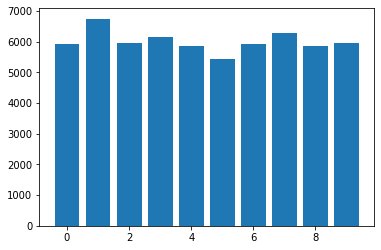

In [9]:
plt.bar(digitos, cantidad)

##Limpieza de datos
Ahora que hemos visto la estructura de los datos, trabajemos más en ella antes de crear el modelo.

Para trabajar con la API de Keras, necesitamos remodelar cada imagen al formato de (M x N x 1). Usaremos el método .reshape () para realizar esta acción. Finalmente, normalizamos los datos de la imagen dividiendo cada valor de píxel por 255 (ya que los valores RGB pueden oscilar entre 0 y 255):

In [10]:
# save input image dimensions
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) / 255
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) / 255

print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


A continuación, necesitamos convertir la variable dependiente en forma de números enteros en una matriz de clase binaria. Esto se puede lograr mediante la función to_categorical ():

In [11]:
from tensorflow.keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


¡Ahora estamos listos para crear el modelo y entrenarlo!

##Diseñar un modelo
El proceso de diseño del modelo es el factor más complejo y tiene un impacto directo en el rendimiento del modelo. Para este tutorial, usaremos este diseño de la documentación de Keras.

Para crear el modelo, primero inicializamos un modelo secuencial. Crea un objeto modelo vacío. El primer paso es agregar una capa convolucional, que toma la imagen de entrada:

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1)))

Una activación relu significa "Unidades lineales rectificadas", que toma el máximo de un valor o cero. A continuación, agregamos otra capa convolucional, seguida de una capa de agrupación:

In [13]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


A continuación, agregamos una capa de "abandono". Si bien las redes neuronales se entrenan en enormes conjuntos de datos, puede ocurrir un problema de sobreajuste. Para evitar este problema, dejamos caer unidades y sus conexiones al azar durante el proceso de entrenamiento. En este caso, eliminaremos el 25% de las unidades: 

In [14]:
model.add(Dropout(0.25))

A continuación, agregamos una capa de aplanamiento para convertir la capa oculta anterior en una matriz 1D:

In [15]:
model.add(Flatten())

Una vez que hayamos aplanado los datos en una matriz 1D, podemos agregar una capa oculta densa, lo cual es normal para una red neuronal tradicional. A continuación, agregue otra capa de abandono antes de agregar una capa densa final que clasifica los datos: 

In [16]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

La activación de softmax se utiliza cuando nos gustaría clasificar los datos en una serie de clases predeterminadas.

##Visualizar el modelo
Podemos visualizar el modelo de CNN que hemos definido de dos formas:
- En formato descriptivo de capas

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

- En diagrama de bloques

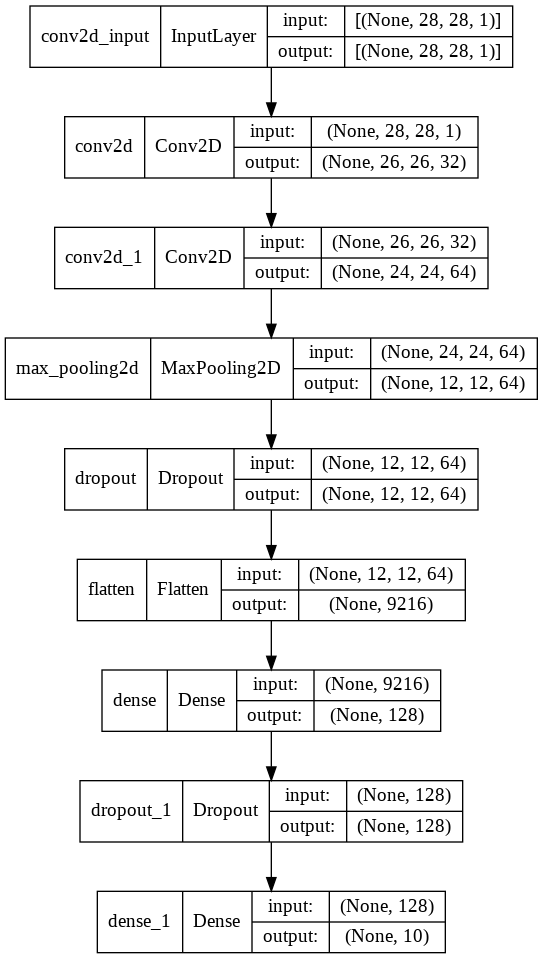

In [18]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##Compilar y entrenar modelo
En el proceso de diseño del modelo, creamos un modelo vacío sin una función objetivo. Necesitamos compilar el modelo y especificar una función de pérdida, una función de optimización y una métrica para evaluar el rendimiento del modelo.

Necesitamos usar una función de pérdida sparse_categorical_crossentropy () en caso de que tengamos una variable dependiente de números enteros. Para una variable dependiente basada en vectores como una matriz de diez tamaños como la salida de cada caso de prueba, use categorical_crossentropy. En este ejemplo, usaremos adam optimizer. La métrica es la base para la evaluación del rendimiento de nuestro modelo, aunque es solo para nosotros juzgar y no se utiliza en el paso de formación:

In [19]:
model.compile(loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

Ahora estamos listos para entrenar el modelo con el método .fit(). Necesitamos especificar un epoch (número de iteraciones) y un batch (tamaño de lote) al entrenar el modelo. Un epoch es una iteración que consiste en un pase hacia adelante y un pase hacia atrás de todos los ejemplos de entrenamiento. Un batch o tamaño de lote es la cantidad de ejemplos de entrenamiento en una pasada hacia adelante o hacia atrás.

Finalmente, guarde el modelo una vez que se complete el entrenamiento para usar sus resultados en una etapa posterior:

In [20]:
batch_size = 128
epochs = 4 #Valor recomendado 10

history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

Epoch 1/10
469/469 [==============================] - 144s 304ms/step - loss: 0.2455 - accuracy: 0.9248 - val_loss: 0.0525 - val_accuracy: 0.9832
Epoch 2/10
469/469 [==============================] - ETA: 0s - loss: 0.0856 - accuracy: 0.9743

KeyboardInterrupt: ignored

Cuando ejecutamos el código anterior, se muestra el siguiente resultado a medida que se ejecuta el modelo. Tarda unos 3 minutos por epoch

Podemos ver el historial de indicadores del modelo: loss (pérdida) y accuracy (precisión) tanto del conjunto de entrenamiento (train) como del conjunto de validación (test) y representar su evolución con cada pasada o epoch

In [ ]:
print(history.history.keys())

In [ ]:
plt.plot(history.history['loss'],'g')
plt.plot(history.history['val_loss'],'r')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'],'g')
plt.plot(history.history['val_accuracy'],'r')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='best')
plt.show()

Al final del último epoch o iteración, la precisión del conjunto de datos de prueba es del 99,1%. Es difícil saber a priori si la precisión es lo suficientemente alta. Para una prueba de funcionamiento, la precisión superior al 99% es muy buena

Comprobemos en qué casos nuestro modelo de reconocimiento de dígitos ha fallado en el conjunto de entrenamiento

In [ ]:
predictions0=model.predict(x_train)
#(y_train==predictions0).sum(), (y_train==predictions0).count(), (y_train==predictions0).sum()/(y_train==predictions0).count()

In [ ]:
y_pred=np.argmax(predictions0,axis=1)

Recuperamos los datos originales de x_train e y_train

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
fallos_train=x_train[(y_train!=y_pred)]
num_train=16
plt.imshow(fallos_train[num_train], cmap='Greys')
plt.show()
print("Número: ",y_train[y_train!=y_pred][num_train])
print("Número predicho: ",y_pred[y_train!=y_pred][num_train])

Podemos visualizar más casos de entrenamiento donde nuestro modelo falla en su predicción

In [ ]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(fallos_train[i], cmap=plt.get_cmap('Greys'))
plt.show()

Y podemos contabilizar para cada dígito los casos donde se producen errores de clasificación y cuáles son las dígitos predichos erróneamente, para saber con qué números tiene menor precisión nuestro modelo

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
labels = np.arange(10)
cm = confusion_matrix(y_train, y_pred, labels=labels)
print(cm)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#Ejercicio
- ¿cuál es el dígito que genera el mayor número de errores?

- ¿cuál es la predicción errónea más frecuente?

Sin embargo, hay mucho margen de mejora modificando los parámetros del modelo. Hay un envío de un concurso de reconocimiento de dígitos en Kaggle que alcanzó el 99,7% de precisión.
Las técnicas que pueden aplicarse para mejorar el aprendizaje y obtener más precisión:
 - Mejorar el modelo (añadir o quitar capas: lo más complejo puede no ser lo óptimo)
 - Ajuste de parámetros. Tiene infinitas posibilidades y la experiencia en casos similares es la mejor guía
 - Ampliar los datos de entrenamiento. Conseguir más datos de entrenamiento es muchas veces costoso pero existen técnica para modificar las imágenes de entrenamiento con pequeñas variaciones (Data Augmentation).  La tarea es crear diferentes versiones de la misma imagen mediante algunas manipulaciones aplicadas. ¿Por qué? Porque un modelo de aprendizaje profundo requiere muchas muestras de entrenamiento, y el aumento ayuda a incrementar el tamaño del conjunto de entrenamiento con mayor diversidad de muestras.
Las técnicas más aplicadas son:
- Rotación de la imagen
- Traslación de la imagen
- Recorte
- Cambio de escala
- Cambio de intensidad
- Adición de ruido
- Mejora de la imagen
- Filtado de la imagen


##Prueba con dígitos escritos a mano
Ahora que el modelo está listo, utilicemos una imagen personalizada para evaluar el rendimiento del modelo. He alojado un dígito personalizado de 28 × 28 en Imgur. Primero, leamos la imagen usando la biblioteca de imágenes y exploremos cómo se ven los datos de entrada:

In [ ]:
import imageio
import numpy as np
from matplotlib import pyplot as plt

im = imageio.imread("https://i.imgur.com/a3Rql9C.png")

A continuación, convierta los valores RGB a escala de grises. Luego podemos usar el método .imshow () como se exploró anteriormente para mostrar la imagen:

In [ ]:
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

A continuación, cambie la forma de la imagen y normalice los valores para que esté lista para usarse en el modelo que acabamos de crear:

In [ ]:
# reshape and normalize imagethe image
gray = gray.reshape(1, img_rows, img_cols, 1) / 255


Cargue el modelo del archivo guardado usando la función load_model () y prediga el dígito usando el método .predict ():

In [ ]:
# load the model
from keras.models import load_model
model = load_model("test_model.h5")

# predict digit
prediction = model.predict(gray)
print(prediction.argmax())

Podemos ver que la predicción consiste en un array de 10 probabilidades donde escogemos el valor mayor como dígito más probable

In [ ]:
print(prediction)

In [ ]:
print(prediction.round(1))

In [ ]:
print(prediction.argmax())

El modelo predice correctamente el dígito que se muestra en la imagen:


En este ejemplo hemos creado una red neuronal con Keras usando el back-end de TensorFlow para clasificar dígitos escritos a mano. Aunque alcanzamos una precisión del 99%, todavía hay oportunidades de mejora. También aprendimos cómo clasificar dígitos escritos a mano personalizados, que no formaban parte del conjunto de datos de prueba. Este tutorial, sin embargo, acaba de arañar la superficie del campo de las redes neuronales artificiales. Existen infinitos usos para las redes neuronales que solo están limitados por nuestra imaginación.


##Fuentes
https://www.sitepoint.com/keras-digit-recognition-tutorial/

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/